In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
games = pd.read_csv('dadosoficina04.txt')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
vendas_nintendo = games[games['Publisher'] == 'Nintendo']
generos_nintendo = vendas_nintendo.groupby(by='Genre').sum()

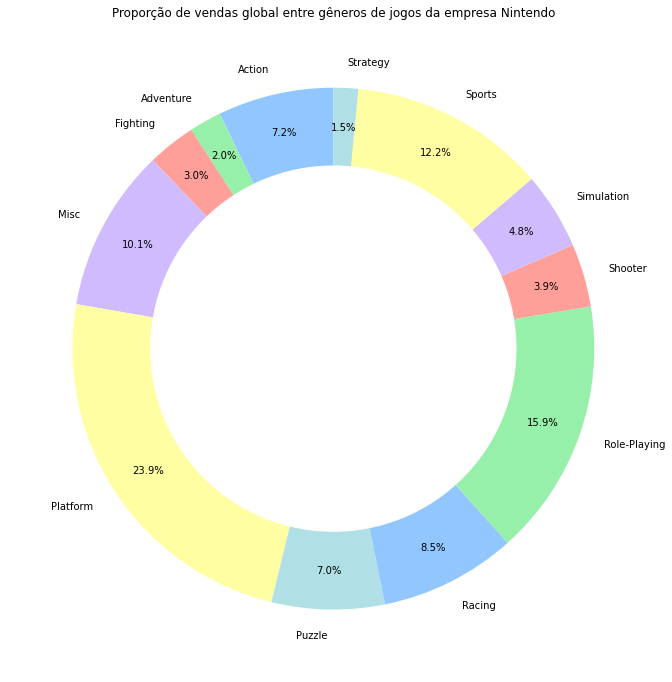

In [4]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn-pastel')
plt.title('Proporção de vendas global entre gêneros de jogos da empresa Nintendo')
plt.pie(x=generos_nintendo['Global_Sales'], labels = generos_nintendo.index, autopct='%1.1f%%',startangle=90, pctdistance=0.85)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [5]:
periodo = games[games['Year'] >= 2015]
periodo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
109,110,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96


In [6]:
jogos_por_plataforma = periodo.groupby('Platform').sum()
jogos_por_plataforma

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
3DS,1240523,243850.0,6.65,5.34,20.42,1.11,33.59
DS,5959,2020.0,0.27,0.00,0.00,0.02,0.29
PC,1069198,177358.0,3.04,6.87,0.00,0.72,10.67
PS3,1169252,213622.0,5.16,8.23,4.80,2.57,20.81
PS4,2143749,493784.0,52.62,67.91,10.45,23.59,154.58
PSP,43389,6045.0,0.00,0.00,0.12,0.00,0.12
PSV,2359673,352689.0,0.73,1.58,7.54,0.62,10.52
Wii,34894,8060.0,0.57,0.87,0.00,0.12,1.55
WiiU,317560,76580.0,8.26,5.89,3.96,1.54,19.67


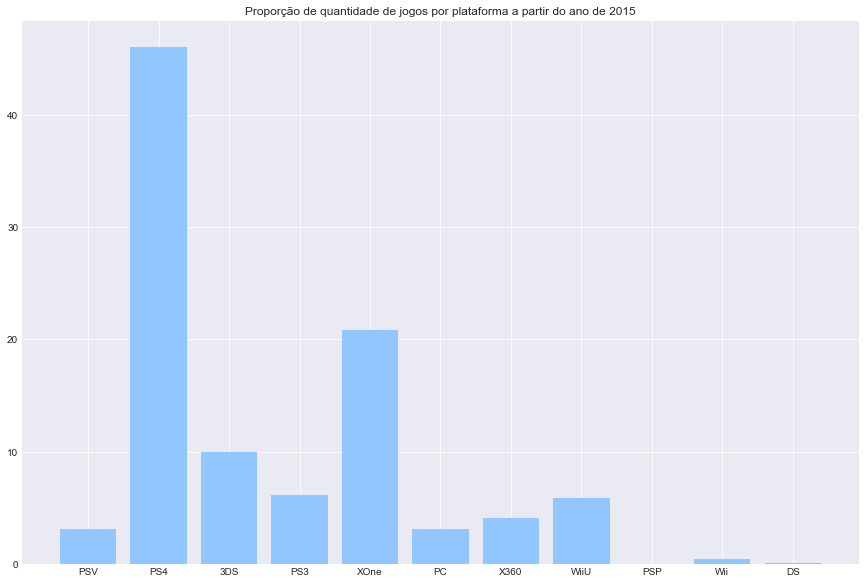

In [7]:
jogos = jogos_por_plataforma.sort_values(by='Rank',ascending=False)
porcentagens = jogos['Global_Sales']*100.0/jogos['Global_Sales'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.bar(jogos.index,porcentagens)
plt.title('Proporção de quantidade de jogos por plataforma a partir do ano de 2015')
plt.show()